<a href="https://colab.research.google.com/github/MYElmasry/Fall-Detection/blob/main/fallDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Used Libraries**

In [1]:
from matplotlib import pyplot
from matplotlib.image import imread
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.utils import load_img
from keras.utils import img_to_array
from keras.models import load_model
from matplotlib import image as mpimg
from PIL import ImageFile

# **Plot some photos of fall events and activities of daily life**

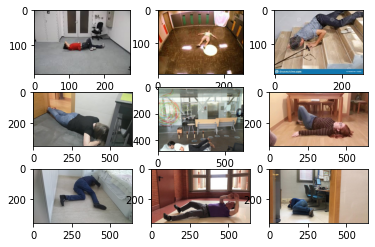

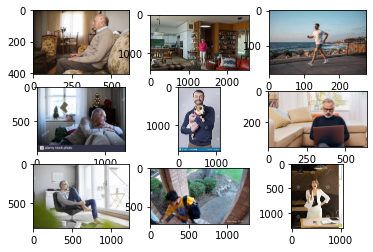

In [2]:
# plot photos

# define location of dataset
folder = '/content/drive/MyDrive/fallVSAdl/train/'
# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # define filename
    filename = folder + 'fall.' + str(i) + '.jpg'
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # define filename
    filename = folder + 'adl.' + str(i) + '.jpg'
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

# **Split the dataset into train and test**

In [3]:
# make directiories

dataset_home = '/content/drive/MyDrive/Fall_detecion_dataset/'
subdirs = ['train/', 'test/']
for subdir in subdirs:
    # create label subdirectories
    labeldirs = ['fall/', 'adl/']
    for labldir in labeldirs:
        newdir = dataset_home + subdir + labldir
        makedirs(newdir, exist_ok=True)
        
# seed random number generator
seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.25
src_directory = '/content/drive/MyDrive/fallVSAdl/train/'
for file in listdir(src_directory):
    src = src_directory + '/' + file
    dst_dir = 'train/'
    if random() < val_ratio:
        dst_dir = 'test/'
    if file.startswith('fall'):
        dst = dataset_home + dst_dir + 'fall/' + file
        copyfile(src, dst)
    elif file.startswith('adl'):
        dst = dataset_home + dst_dir + 'adl/' + file
        copyfile(src, dst)

# **Fit the model and calculate the accuracy**

In [5]:
# define cnn model
def define_model():
    model = Sequential()
    model = VGG16(include_top=False, input_shape=(224, 224, 3))
    for layer in model.layers:
        layer.trainable = False
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)    
    output = Dense(1, activation='sigmoid')(class1)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

    
# run the test harness for evaluating a model
def run_test_harness():
    # from PIL import ImageFile
    # ImageFile.LOAD_TRUNCATED_IMAGES = True
    # define model
    model = define_model()
    # create data generator
    datagen = ImageDataGenerator(featurewise_center=True)
    datagen.mean = [123.68, 116.779, 103.939]
    # prepare iterators
    train_it = datagen.flow_from_directory('/content/drive/MyDrive/Fall_detecion_dataset/train/',
    class_mode='binary', batch_size=64, target_size=(224, 224))
    test_it = datagen.flow_from_directory('/content/drive/MyDrive/Fall_detecion_dataset/test/',
    class_mode='binary', batch_size=64, target_size=(224, 224))
    # fit model
    history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
    validation_data=test_it, validation_steps=len(test_it), epochs=10, verbose=1)
    # evaluate model
    _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=1)
    print('Accuracy => %.3f' % (acc * 100.0))
    
    
# entry point, run the test harness
run_test_harness()

Found 360 images belonging to 2 classes.
Found 125 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/10
6/6 [==============================] - 230s 39s/step - loss: 6.3976 - accuracy: 0.6556 - val_loss: 2.3501 - val_accuracy: 0.7760
Epoch 2/10
6/6 [==============================] - 228s 39s/step - loss: 0.9784 - accuracy: 0.9278 - val_loss: 0.7891 - val_accuracy: 0.9280
Epoch 3/10
6/6 [==============================] - 249s 43s/step - loss: 0.1060 - accuracy: 0.9889 - val_loss: 0.3555 - val_accuracy: 0.9280
Epoch 4/10
6/6 [==============================] - 249s 44s/step - loss: 0.0216 - accuracy: 0.9889 - val_loss: 0.2765 - val_accuracy: 0.9280
Epoch 5/10
6/6 [==============================] - 248s 46s/step - loss: 0.0048 - accuracy: 0.9972 - val_loss: 0.2650 - val_accuracy: 0.9360
Epoch 6/10
6/6 [==============================] - 254s 45s/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.2664 - val_accuracy: 0.9360
Epoch 7/10
6/6 [==============================] - 249s 46s/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.2685 - val_accuracy: 0.9360
Epoch 8/10
6/6 [====

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.


2/2 [==============================] - 58s 27s/step - loss: 0.2704 - accuracy: 0.9360
Accuracy => 93.600


# **Save the model**

In [6]:
# create directories
dataset_home = '/content/drive/MyDrive/final/'
# create label subdirectories
labeldirs = ['fall/', 'adl/']
for labldir in labeldirs:
    newdir = dataset_home + labldir
    makedirs(newdir, exist_ok=True)
src_directory = '/content/drive/MyDrive/fallVSAdl/train/'
for file in listdir(src_directory):
    src = src_directory + '/' + file
    if file.startswith('fall'):
        dst = dataset_home + 'fall/' + file
        copyfile(src, dst)
    elif file.startswith('adl'):
        dst = dataset_home + 'adl/' + file
        copyfile(src, dst)

In [7]:
def define_model():
    # load model
    model = VGG16(include_top=False, input_shape=(224, 224, 3))
    # mark loaded layers as not trainable
    for layer in model.layers:
        layer.trainable = False
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(1, activation='sigmoid')(class1)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# run the test harness for evaluating a model
def run_test_harness():
    # define model
    # ImageFile.LOAD_TRUNCATED_IMAGES = True
    model = define_model()
    # create data generator
    datagen = ImageDataGenerator(featurewise_center=True)
    # specify imagenet mean values for centering
    datagen.mean = [123.68, 116.779, 103.939]
    # prepare iterator
    train_it = datagen.flow_from_directory('/content/drive/MyDrive/final/',
    class_mode='binary', batch_size=64, target_size=(224, 224))
    # fit model
    model.fit_generator(train_it, steps_per_epoch=len(train_it), epochs=10, verbose=1)
    # save model
    model.save('final_model.h5')
# entry point, run the test harness
run_test_harness()

Found 485 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/10
8/8 [==============================] - 230s 30s/step - loss: 10.1909 - accuracy: 0.6371
Epoch 2/10
8/8 [==============================] - 223s 28s/step - loss: 0.2291 - accuracy: 0.8948
Epoch 3/10
8/8 [==============================] - 223s 28s/step - loss: 0.1077 - accuracy: 0.9691
Epoch 4/10
8/8 [==============================] - 228s 28s/step - loss: 0.0419 - accuracy: 0.9959
Epoch 5/10
8/8 [==============================] - 226s 30s/step - loss: 0.0176 - accuracy: 0.9938
Epoch 6/10
8/8 [==============================] - 228s 28s/step - loss: 0.0082 - accuracy: 1.0000
Epoch 7/10
8/8 [==============================] - 225s 28s/step - loss: 0.0058 - accuracy: 1.0000
Epoch 8/10
8/8 [==============================] - 230s 30s/step - loss: 0.0035 - accuracy: 1.0000
Epoch 9/10
8/8 [==============================] - 226s 29s/step - loss: 0.0028 - accuracy: 1.0000
Epoch 10/10
8/8 [==============================] - 225s 28s/step - loss: 0.0025 - accuracy: 1.0000


# **Make a prediction**

Fall


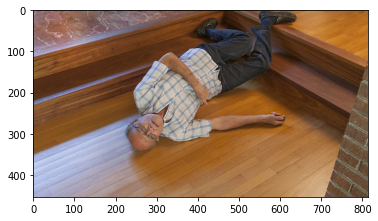

In [20]:
def load_image(filename):
    # load the image
    img = load_img(filename, target_size=(224, 224))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 3 channels
    img = img.reshape(1, 224, 224, 3)
    # center pixel data
    img = img.astype('float32')
    img = img - [123.68, 116.779, 103.939]
    return img

# load an image and predict the class
def run_example():
    # load the image
    name = "test.jpg"
    img = load_image('/content/drive/MyDrive/test_imgs/'+name)
    # load model
    model = load_model('/content/drive/MyDrive/final_model.h5')
    # predict the class
    result = model.predict(img, verbose="0")
    image = mpimg.imread('/content/drive/MyDrive/test_imgs/'+name)
    pyplot.imshow(image)
    if round(result[0][0]) == 0:
        print("Not Fall")
    else:
        print("Fall")
# entry point, run the example
run_example()